In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

In [2]:
dbd_jakbar_df =pd.read_csv("DBD Jakarta Barat.csv")
dbd_jakbar_df

,Year&Month,Year,Month,Kota adm.,Penderita
0,2017 Jan,2017,Jan,Jakarta Barat,185
1,2017 Feb,2017,Feb,Jakarta Barat,79
2,2017 Mar,2017,Mar,Jakarta Barat,112
3,2017 Apr,2017,Apr,Jakarta Barat,79
4,2017 May,2017,May,Jakarta Barat,81
5,2017 Jun,2017,Jun,Jakarta Barat,44
6,2017 Jul,2017,Jul,Jakarta Barat,44
7,2017 Aug,2017,Aug,Jakarta Barat,34
8,2017 Sep,2017,Sep,Jakarta Barat,24
9,2017 Oct,2017,Oct,Jakarta Barat,58


In [3]:
dbd_jakbar_df['Month Period'] = [ x+1 for x in range(0, len(dbd_jakbar_df))]

In [4]:
dbd_jakbar_df.rename(columns = {'Penderita': 'jml_penderita_jakbar'}, inplace=True)

In [5]:
dbd_jakbar_df

,Year&Month,Year,Month,Kota adm.,jml_penderita_jakbar,Month Period
0,2017 Jan,2017,Jan,Jakarta Barat,185,1
1,2017 Feb,2017,Feb,Jakarta Barat,79,2
2,2017 Mar,2017,Mar,Jakarta Barat,112,3
3,2017 Apr,2017,Apr,Jakarta Barat,79,4
4,2017 May,2017,May,Jakarta Barat,81,5
5,2017 Jun,2017,Jun,Jakarta Barat,44,6
6,2017 Jul,2017,Jul,Jakarta Barat,44,7
7,2017 Aug,2017,Aug,Jakarta Barat,34,8
8,2017 Sep,2017,Sep,Jakarta Barat,24,9
9,2017 Oct,2017,Oct,Jakarta Barat,58,10


In [6]:
dbd_jakbar_df = dbd_jakbar_df[['Month Period', 'Year&Month', 'jml_penderita_jakbar']]
dbd_jakbar_df

,Month Period,Year&Month,jml_penderita_jakbar
0,1,2017 Jan,185
1,2,2017 Feb,79
2,3,2017 Mar,112
3,4,2017 Apr,79
4,5,2017 May,81
5,6,2017 Jun,44
6,7,2017 Jul,44
7,8,2017 Aug,34
8,9,2017 Sep,24
9,10,2017 Oct,58


In [7]:
dbd_jakbar_df.describe()

,Month Period,jml_penderita_jakbar
count,48.00,48.000000
mean,24.50,87.270833
std,14.00,114.053131
min,1.00,2.000000
25%,12.75,24.750000
50%,24.50,44.500000
75%,36.25,84.500000
max,48.00,539.000000


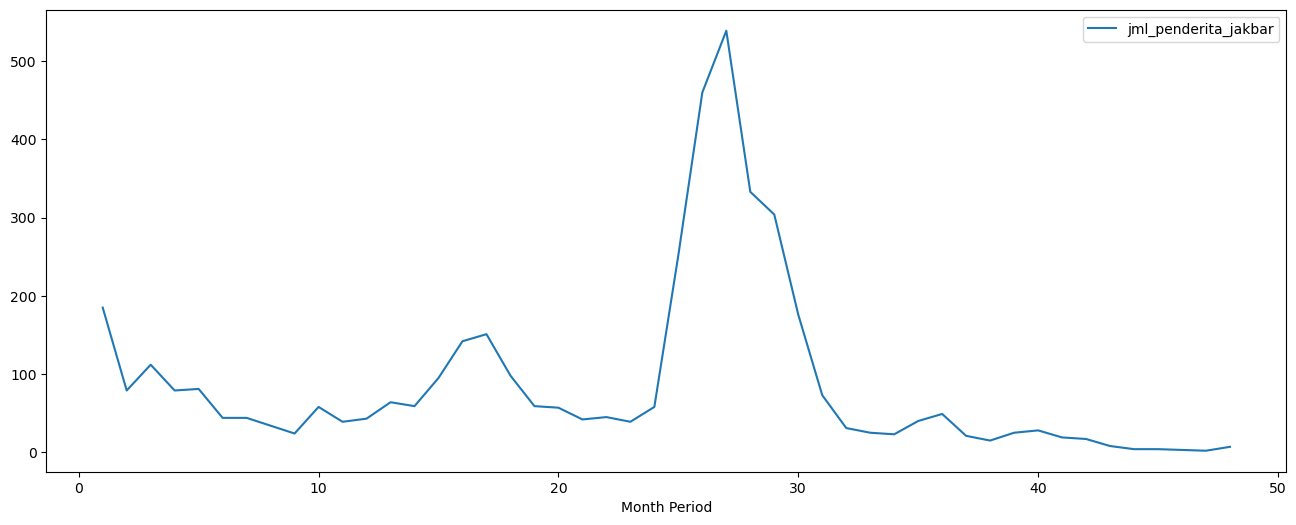

In [8]:
ax = dbd_jakbar_df.set_index('Month Period').plot(figsize=(16, 6))

In [9]:
dbd_jakpus_df =pd.read_csv("DBD Jakarta Pusat.csv")
dbd_jakpus_df

,Year&Month,Year,Month,Kota adm.,Penderita
0,2017 Jan,2017,Jan,Jakarta Pusat,31
1,2017 Feb,2017,Feb,Jakarta Pusat,12
2,2017 Mar,2017,Mar,Jakarta Pusat,13
3,2017 Apr,2017,Apr,Jakarta Pusat,13
4,2017 May,2017,May,Jakarta Pusat,9
5,2017 Jun,2017,Jun,Jakarta Pusat,16
6,2017 Jul,2017,Jul,Jakarta Pusat,3
7,2017 Aug,2017,Aug,Jakarta Pusat,7
8,2017 Sep,2017,Sep,Jakarta Pusat,4
9,2017 Oct,2017,Oct,Jakarta Pusat,5


In [10]:
dbd_jakpus_df['Month Period'] = [ x+1 for x in range(0, len(dbd_jakpus_df))]

In [11]:
dbd_jakpus_df.rename(columns = {'Penderita': 'jml_penderita_jakpus'}, inplace=True)

In [12]:
dbd_jakpus_df

,Year&Month,Year,Month,Kota adm.,jml_penderita_jakpus,Month Period
0,2017 Jan,2017,Jan,Jakarta Pusat,31,1
1,2017 Feb,2017,Feb,Jakarta Pusat,12,2
2,2017 Mar,2017,Mar,Jakarta Pusat,13,3
3,2017 Apr,2017,Apr,Jakarta Pusat,13,4
4,2017 May,2017,May,Jakarta Pusat,9,5
5,2017 Jun,2017,Jun,Jakarta Pusat,16,6
6,2017 Jul,2017,Jul,Jakarta Pusat,3,7
7,2017 Aug,2017,Aug,Jakarta Pusat,7,8
8,2017 Sep,2017,Sep,Jakarta Pusat,4,9
9,2017 Oct,2017,Oct,Jakarta Pusat,5,10


In [13]:
dbd_jakpus_df = dbd_jakpus_df[['Month Period', 'Year&Month', 'jml_penderita_jakpus']]
dbd_jakpus_df

,Month Period,Year&Month,jml_penderita_jakpus
0,1,2017 Jan,31
1,2,2017 Feb,12
2,3,2017 Mar,13
3,4,2017 Apr,13
4,5,2017 May,9
5,6,2017 Jun,16
6,7,2017 Jul,3
7,8,2017 Aug,7
8,9,2017 Sep,4
9,10,2017 Oct,5


In [14]:
dbd_jakpus_df.describe()

,Month Period,jml_penderita_jakpus
count,48.00,48.000000
mean,24.50,22.979167
std,14.00,33.253693
min,1.00,0.000000
25%,12.75,4.000000
50%,24.50,8.500000
75%,36.25,23.500000
max,48.00,136.000000


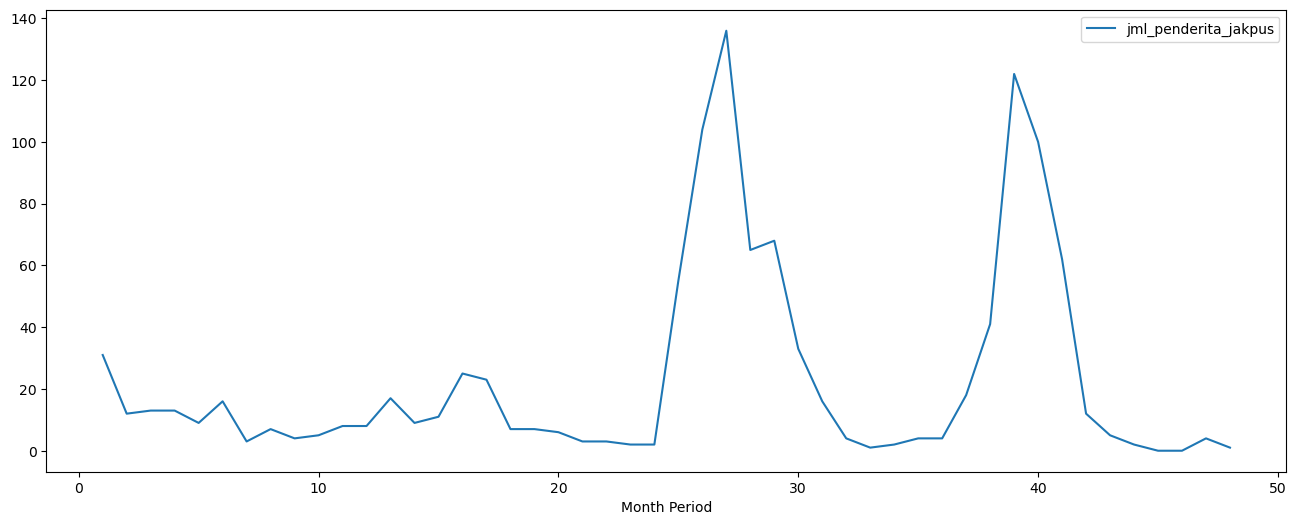

In [15]:
ax = dbd_jakpus_df.set_index('Month Period').plot(figsize=(16, 6))

In [16]:
dbd_jakut_df =pd.read_csv("DBD Jakarta Utara.csv")
dbd_jakut_df

,Year&Month,Year,Month,Kota adm.,Penderita
0,2017 Jan,2017,Jan,Jakarta Utara,94
1,2017 Feb,2017,Feb,Jakarta Utara,54
2,2017 Mar,2017,Mar,Jakarta Utara,73
3,2017 Apr,2017,Apr,Jakarta Utara,49
4,2017 May,2017,May,Jakarta Utara,57
5,2017 Jun,2017,Jun,Jakarta Utara,23
6,2017 Jul,2017,Jul,Jakarta Utara,18
7,2017 Aug,2017,Aug,Jakarta Utara,11
8,2017 Sep,2017,Sep,Jakarta Utara,11
9,2017 Oct,2017,Oct,Jakarta Utara,53


In [17]:
dbd_jakut_df =pd.read_csv("DBD Jakarta Utara.csv")
dbd_jakut_df

,Year&Month,Year,Month,Kota adm.,Penderita
0,2017 Jan,2017,Jan,Jakarta Utara,94
1,2017 Feb,2017,Feb,Jakarta Utara,54
2,2017 Mar,2017,Mar,Jakarta Utara,73
3,2017 Apr,2017,Apr,Jakarta Utara,49
4,2017 May,2017,May,Jakarta Utara,57
5,2017 Jun,2017,Jun,Jakarta Utara,23
6,2017 Jul,2017,Jul,Jakarta Utara,18
7,2017 Aug,2017,Aug,Jakarta Utara,11
8,2017 Sep,2017,Sep,Jakarta Utara,11
9,2017 Oct,2017,Oct,Jakarta Utara,53


In [18]:
dbd_jakut_df['Month Period'] = [ x+1 for x in range(0, len(dbd_jakut_df))]

In [19]:
dbd_jakut_df.rename(columns = {'Penderita': 'jml_penderita_jakut'}, inplace=True)

In [20]:
dbd_jakut_df

,Year&Month,Year,Month,Kota adm.,jml_penderita_jakut,Month Period
0,2017 Jan,2017,Jan,Jakarta Utara,94,1
1,2017 Feb,2017,Feb,Jakarta Utara,54,2
2,2017 Mar,2017,Mar,Jakarta Utara,73,3
3,2017 Apr,2017,Apr,Jakarta Utara,49,4
4,2017 May,2017,May,Jakarta Utara,57,5
5,2017 Jun,2017,Jun,Jakarta Utara,23,6
6,2017 Jul,2017,Jul,Jakarta Utara,18,7
7,2017 Aug,2017,Aug,Jakarta Utara,11,8
8,2017 Sep,2017,Sep,Jakarta Utara,11,9
9,2017 Oct,2017,Oct,Jakarta Utara,53,10


In [21]:
dbd_jakut_df = dbd_jakut_df[['Month Period', 'Year&Month', 'jml_penderita_jakut']]
dbd_jakut_df

,Month Period,Year&Month,jml_penderita_jakut
0,1,2017 Jan,94
1,2,2017 Feb,54
2,3,2017 Mar,73
3,4,2017 Apr,49
4,5,2017 May,57
5,6,2017 Jun,23
6,7,2017 Jul,18
7,8,2017 Aug,11
8,9,2017 Sep,11
9,10,2017 Oct,53


In [22]:
dbd_jakut_df.describe()

,Month Period,jml_penderita_jakut
count,48.00,48.000000
mean,24.50,50.291667
std,14.00,52.608534
min,1.00,4.000000
25%,12.75,12.750000
50%,24.50,27.500000
75%,36.25,63.000000
max,48.00,221.000000


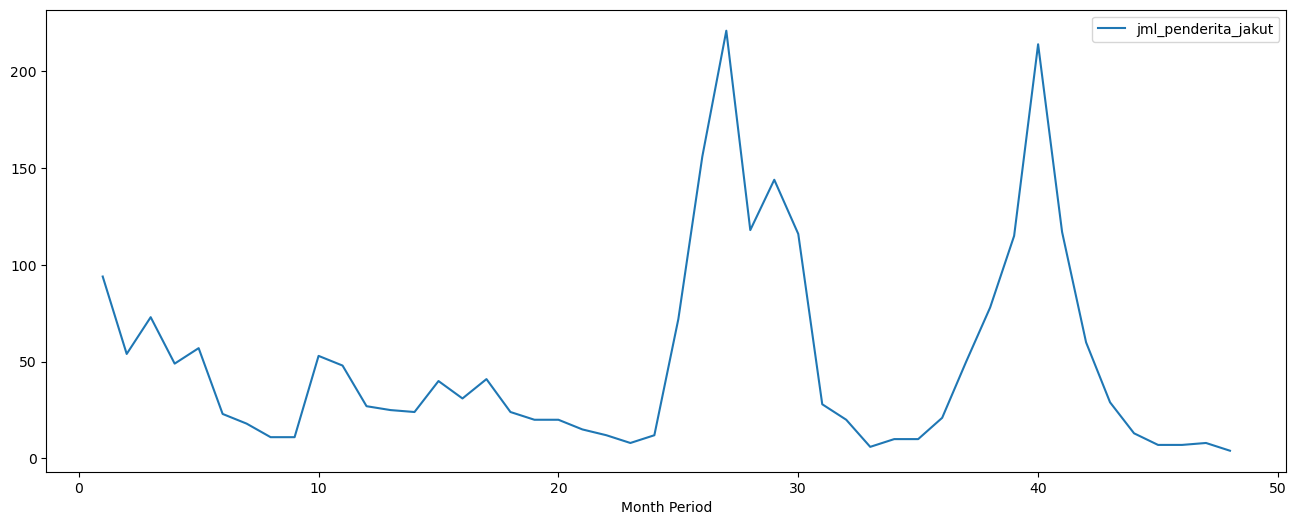

In [23]:
ax = dbd_jakut_df.set_index('Month Period').plot(figsize=(16, 6))

### Plot data

In [24]:
dbd =pd.read_csv("dbd.csv")
dbd

,Jakbar,Jakpus,Jakut
0,185,31,94
1,79,12,54
2,112,13,73
3,79,13,49
4,81,9,57
5,44,16,23
6,44,3,18
7,34,7,11
8,24,4,11
9,58,5,53


In [25]:
dbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Jakbar  48 non-null     int64
 1   Jakpus  48 non-null     int64
 2   Jakut   48 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [26]:
dbd.describe()

,Jakbar,Jakpus,Jakut
count,48.000000,48.000000,48.000000
mean,110.437500,22.979167,50.270833
std,119.659251,33.253693,52.624216
min,11.000000,0.000000,4.000000
25%,39.000000,4.000000,12.750000
50%,59.000000,8.500000,27.500000
75%,144.250000,23.500000,63.000000
max,539.000000,136.000000,221.000000


In [27]:
dbd['Month Period'] = [ x+1 for x in range(0, len(dbd))]

In [28]:
dbd = dbd[['Month Period', 'Jakbar', 'Jakpus' ,'Jakut']]
dbd

,Month Period,Jakbar,Jakpus,Jakut
0,1,185,31,94
1,2,79,12,54
2,3,112,13,73
3,4,79,13,49
4,5,81,9,57
5,6,44,16,23
6,7,44,3,18
7,8,34,7,11
8,9,24,4,11
9,10,58,5,53


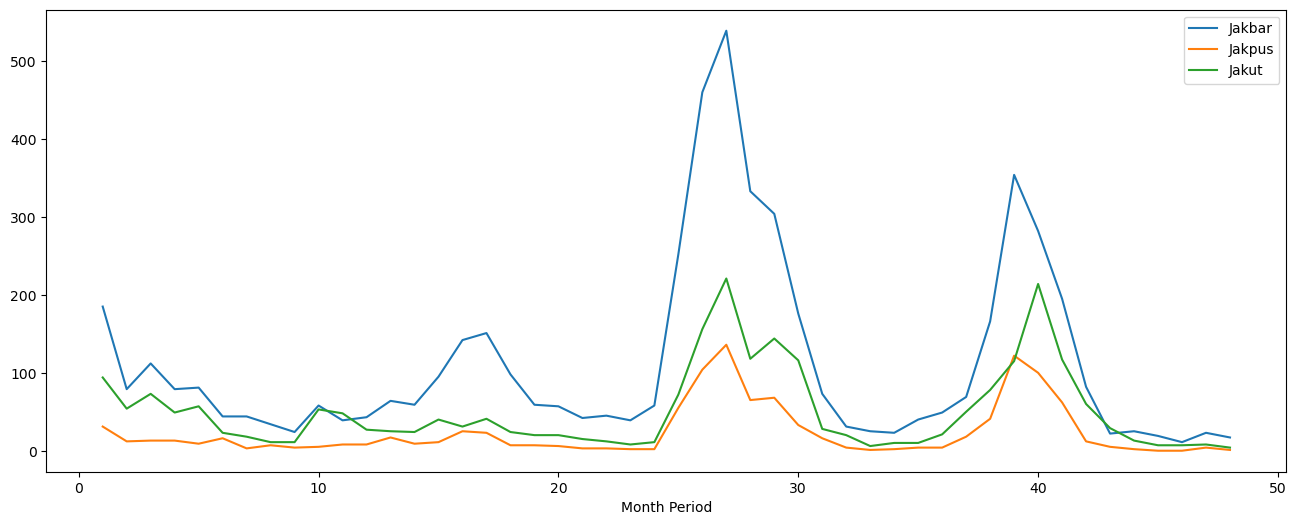

In [29]:
ax = dbd.set_index('Month Period').plot(figsize=(16, 6))

### Stasioner Data

Jakarta Barat

In [30]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    datatest = adfuller(series, autolag='AIC')
    dataoutput = pd.Series(datatest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in datatest[4].items():
       dataoutput['Critical Value (%s)'%key] = value
    print (dataoutput)
    if datatest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [31]:
Augmented_Dickey_Fuller_Test_func(dbd_jakbar_df['jml_penderita_jakbar'],'jml_penderita_jakbar')

Results of Dickey-Fuller Test for column: jml_penderita_jakbar
Test Statistic                 -2.984448
p-value                         0.036373
No Lags Used                    1.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Jakarta Pusat

In [32]:
Augmented_Dickey_Fuller_Test_func(dbd_jakpus_df['jml_penderita_jakpus'],'jml_penderita_jakpus')

Results of Dickey-Fuller Test for column: jml_penderita_jakpus
Test Statistic                 -3.790059
p-value                         0.003011
No Lags Used                    2.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Jakarta Pusat

In [33]:
Augmented_Dickey_Fuller_Test_func(dbd_jakut_df['jml_penderita_jakut'],'jml_penderita_jakut')

Results of Dickey-Fuller Test for column: jml_penderita_jakut
Test Statistic                 -3.699251
p-value                         0.004124
No Lags Used                    3.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


### AIC

In [34]:
penderita_DBD = dbd[['Month Period', 'Jakbar', 'Jakpus', 'Jakut']]   

In [35]:
model = VAR (penderita_DBD)

In [36]:
res = model.select_order(5) 
res.summary()

,AIC,BIC,FPE,HQIC
0,25.27,25.43,9.386e+10,25.33
1,-45.77*,-44.95*,1.326e-20*,-45.47*
2,-41.61,-40.13,8.751e-19,-41.06
3,-42.57,-40.45,3.498e-19,-41.79
4,-39.20,-36.42,1.132e-17,-38.18
5,-40.36,-36.92,4.276e-18,-39.09


### Bobot Lokasi

#### Bobot Lokasi Invers

In [37]:
# W12 = r1/(r1+r2)
# W13 = r2/(r1+r2)
# W21 = r1/(r1+r3)
# W23 = r3/(r1+r3)
# W31 = r3/(r2+r3)
# W32 = r2/(r2+r3)

r1 = 8.7
r2 = 17.6
r3 = 9

In [38]:
W12 = r1/(r1+r2)
# W12 = 8.7/(8.7+17.6)
W12

0.3307984790874524

In [39]:
W13 = r2/(r1+r2)
# W13 = 17.6/(8.7+17.6)
W13

0.6692015209125476

In [40]:
W21 = r1/(r1+r3)
# W21 = 8.7/(8.7+9)
W21

0.4915254237288135

In [41]:
# W23 = r3/(r1+r3)
W23 = 9/(8.7+9)
W23

0.5084745762711864

In [42]:
# W31 = r3/(r2+r3)
W31 = 9/(17.6+9)
W31

0.3383458646616541

In [43]:
#W32 = r3/(r2+r3)
W32 = 17.6/(17.6+9)
W32

0.6616541353383458

In [44]:
a = np.array ([0, W12, W13])
b = np.array ([W21, 0, W23])
c = np.array ([W31, W32, 0])
print(a)
print(b)
print(c)

[0.         0.33079848 0.66920152]
[0.49152542 0.         0.50847458]
[0.33834586 0.66165414 0.        ]


### Estimasi Parameter

In [45]:
dbd =pd.read_csv("dbd.csv")
dbd

,Jakbar,Jakpus,Jakut
0,185,31,94
1,79,12,54
2,112,13,73
3,79,13,49
4,81,9,57
5,44,16,23
6,44,3,18
7,34,7,11
8,24,4,11
9,58,5,53


In [46]:
t1_invers =pd.read_csv("dbdt1_invers.csv")
t1_invers

,Jakbar,Jakpus,Jakut,V1_t1,V2_t1,V3_t1
0,0,0,0,0.000,0.000,0.000
1,185,31,94,73.160,138.729,83.105
2,79,12,54,40.106,66.288,34.669
3,112,13,73,53.152,92.169,46.496
4,79,13,49,37.091,63.746,35.331
5,81,9,57,41.122,68.797,33.361
6,44,16,23,20.684,33.322,25.474
7,44,3,18,13.038,30.780,16.872
8,34,7,11,9.677,22.305,16.135
9,24,4,11,8.684,17.390,10.767


Lokasi 1/ Jakarta Barat

In [47]:
Z1_tmin1 = t1_invers['Jakbar']
V1_tmin1 = t1_invers['V1_t1']

X1 = pd.DataFrame()
X1['Z1_tmin1'] = Z1_tmin1
X1['V1_tmin1'] = V1_tmin1
X1

,Z1_tmin1,V1_tmin1
0,0,0.000
1,185,73.160
2,79,40.106
3,112,53.152
4,79,37.091
5,81,41.122
6,44,20.684
7,44,13.038
8,34,9.677
9,24,8.684


In [48]:
Z1_t = pd.DataFrame(dbd['Jakbar'])
Z1_t

,Jakbar
0,185
1,79
2,112
3,79
4,81
5,44
6,44
7,34
8,24
9,58


In [49]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split

In [50]:
X1_train, X1_test, Z1_train, Z1_test = train_test_split(X1, Z1_t, test_size = 0.1, random_state = 101)

In [51]:
# model = LinearRegression(fit_intercept=False)
# results = model.fit(X1, Z1_t)


sm1 = OLS(endog=Z1_train, exog=X1_train.assign(intercept=0))
# sm1 = OLS(endog=Z1_train, exog=x1_train.assign(intercept=0))
result1 = sm1.fit()
result1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Jakbar   R-squared (uncentered):                   0.826
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              97.55
Date:                Wed, 08 Feb 2023   Prob (F-statistic):                    2.59e-16
Time:                        08:01:07   Log-Likelihood:                         -242.01
No. Observations:                  43   AIC:                                      488.0
Df Residuals:                      41   BIC:                                      491.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Z1_tmin1       1.4925      0.237      6.288      0.000       1.013       1.972
V1_tmin1      -1.7431      0.628     -2.777      0.008      -3.011      -0.476
intercept           0          0        nan        nan           0           0
==============================================================================
Omnibus:                       11.226   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.468
Skew:                           0.971   Prob(JB):                      0.00323
Kurtosis:                       4.622   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
result1.resid

1     -69.584185
44     -1.994918
21      1.542112
16    -10.356506
45     -9.192494
43     28.876776
7      -8.942712
40     81.408983
3       4.491122
39    -41.847211
14     40.128641
25    199.594319
15     53.216557
24    179.420898
41    -36.805517
37    131.721183
42    -23.474582
26     94.396633
10     17.143308
30    -35.336024
32      4.368789
35      3.271636
2      64.002583
27   -135.235760
47     -5.688429
34     18.491649
33     -6.736555
8      -9.876441
19     -3.689820
29    -70.531750
12     35.931534
5      -5.211394
0     185.000000
28    -17.871054
4      27.747142
13      2.446342
9      37.317487
46     14.747365
23     10.277922
6      14.385016
17    -66.276224
11     45.397220
31    -36.064567
dtype: float64

### Ljung Box

In [53]:
from statsmodels.stats import diagnostic

In [54]:
diagnostic.acorr_ljungbox(result1.resid, lags = 1)
#output (stat, p-value)

,lb_stat,lb_pvalue
1,0.74205,0.389005


##### hasil diatas Ho diterima jika alpha = 0.05

In [55]:
# result1.predict(X1.assign(intercept=0))

### Prediction with Data Train

Text(0, 0.5, 'predicted Z1_t')

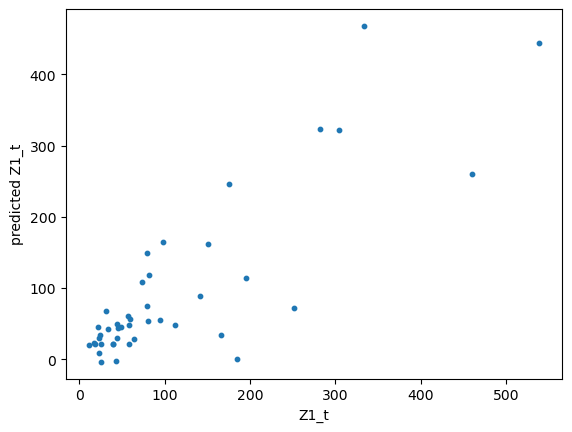

In [56]:
result1 = sm1.fit()
predictions1 = result1.predict(X1_train.assign(intercept=0))
plt.scatter(Z1_train, predictions1, s = 10)
plt.xlabel('Z1_t')
plt.ylabel('predicted Z1_t')

In [57]:
predictions1

1     148.584185
44     20.994918
21     43.457888
16    161.356506
45     20.192494
43     -3.876776
7      42.942712
40    113.591017
3      74.508878
39    323.847211
14     54.871359
25    260.405681
15     88.783443
24     72.579102
41    118.805517
37     34.278817
42     45.474582
26    444.603367
10     21.856692
30    108.336024
32     20.631211
35     45.728364
2      47.997417
27    468.235760
47     22.688429
34     21.508351
33     29.736555
8      33.876441
19     60.689820
29    246.531750
12     28.068466
5      49.211394
0       0.000000
28    321.871054
4      53.252858
13     56.553658
9      20.682513
46      8.252635
23     47.722078
6      29.614984
17    164.276224
11     -2.397220
31     67.064567
dtype: float64

In [58]:
from sklearn import metrics

print('MAE : ', metrics.mean_absolute_error(Z1_train, predictions1))
print('MSE : ', metrics.mean_squared_error(Z1_train, predictions1))
print('RMSE : ', np.sqrt(metrics.mean_absolute_error(Z1_train, predictions1)))
print('R2 Score : ', metrics.r2_score(Z1_train, predictions1))

MAE :  43.95445025611933
MSE :  4529.5306981957265
RMSE :  6.62981525052692
R2 Score :  0.6751055841214535


### Prediction with Data Test

Text(0, 0.5, 'predicted Z1_t')

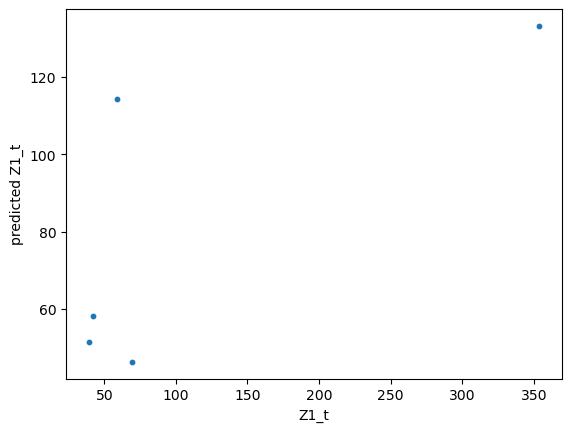

In [59]:
result1 = sm1.fit()
predictions1 = result1.predict(X1_test.assign(intercept=0))
plt.scatter(Z1_test, predictions1, s = 10)
plt.xlabel('Z1_t')
plt.ylabel('predicted Z1_t')

In [60]:
predictions1

36     46.329761
22     51.433733
20     58.281821
38    133.125946
18    114.232102
dtype: float64

In [61]:
from sklearn import metrics

print('MAE : ', metrics.mean_absolute_error(Z1_test, predictions1))
print('MSE : ', metrics.mean_squared_error(Z1_test, predictions1))
print('RMSE : ', np.sqrt(metrics.mean_absolute_error(Z1_test, predictions1)))
print('R2 Score : ', metrics.r2_score(Z1_test, predictions1))

MAE :  65.49839000057342
MSE :  10553.91361690073
RMSE :  8.09310756141134
R2 Score :  0.28155013145815533


Lokasi 2/ Jakarta Pusat

In [62]:
Z2_tmin1 = t1_invers['Jakpus']
V2_tmin1 = t1_invers['V2_t1']

X2 = pd.DataFrame()
X2['Z2_tmin1'] = Z2_tmin1
X2['V2_tmin1'] = V2_tmin1
X2

,Z2_tmin1,V2_tmin1
0,0,0.000
1,31,138.729
2,12,66.288
3,13,92.169
4,13,63.746
5,9,68.797
6,16,33.322
7,3,30.780
8,7,22.305
9,4,17.390


In [63]:
Z2_t = pd.DataFrame(dbd['Jakpus'])
Z2_t

,Jakpus
0,31
1,12
2,13
3,13
4,9
5,16
6,3
7,7
8,4
9,5


In [64]:
X2_train, X2_test, Z2_train, Z2_test = train_test_split(X2, Z2_t, test_size = 0.1, random_state = 101)

In [65]:
# model = LinearRegression(fit_intercept=False)
# results = model.fit(X1, Z1_t)


sm2 = OLS(endog=Z2_train, exog=X2_train.assign(intercept=0))
# sm2 = OLS(endog=y1_train, exog=x1_train.assign(intercept=0))
result2 = sm2.fit()
result2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Jakpus   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              58.92
Date:                Wed, 08 Feb 2023   Prob (F-statistic):                    8.76e-13
Time:                        08:01:08   Log-Likelihood:                         -188.30
No. Observations:                  43   AIC:                                      380.6
Df Residuals:                      41   BIC:                                      384.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Z2_tmin1       0.4878      0.286      1.708      0.095      -0.089       1.065
V2_tmin1       0.1048      0.100      1.047      0.301      -0.097       0.307
intercept           0          0        nan        nan           0           0
==============================================================================
Omnibus:                       14.842   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.738
Skew:                           1.103   Prob(JB):                     8.53e-05
Kurtosis:                       5.365   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
result2.resid

1    -17.660628
44    -2.956182
21    -1.426307
16     1.838578
45    -1.351801
43    -3.117610
7      2.310732
40   -12.708729
3     -3.000961
39    16.127204
14     2.291711
25    60.353768
15    12.608902
24    50.450333
41   -34.522331
37    26.001004
42    -8.275038
26    53.261387
10    -0.251234
30   -15.344977
32    -3.613910
35    -0.544632
2      0.199318
27   -40.880873
47    -2.562276
34     1.306674
33    -0.095404
8     -1.752107
19    -1.519573
29   -23.502983
12     9.443852
5      4.399667
0     31.000000
28    12.851955
4     -4.022032
13    -3.921304
9      1.226328
46     3.060300
23    -1.410939
6     -8.296693
17   -14.182493
11    -0.469227
31    -9.057136
dtype: float64

### Ljung Box

In [67]:
diagnostic.acorr_ljungbox(result2.resid, lags = 1)
#output (stat, p-value)

,lb_stat,lb_pvalue
1,0.285162,0.593338


### Prediction with Data Train

Text(0, 0.5, 'predicted Z2_t')

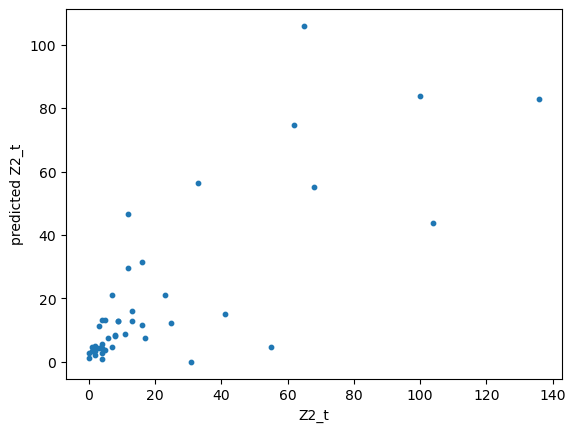

In [68]:
result2 = sm2.fit()
predictions2 = result2.predict(X2_train.assign(intercept=0))
plt.scatter(Z2_train, predictions2, s = 10)
plt.xlabel('Z2_t')
plt.ylabel('predicted Z2_t')

In [69]:
print('MAE : ', metrics.mean_absolute_error(Z2_train, predictions2))
print('MSE : ', metrics.mean_squared_error(Z2_train, predictions2))
print('RMSE : ', np.sqrt(metrics.mean_absolute_error(Z2_train, predictions2)))
print('R2 Score : ', metrics.r2_score(Z2_train, predictions2))

MAE :  11.748350990784479
MSE :  372.4714306959013
RMSE :  3.427586759045565
R2 Score :  0.6095156021713815


### Prediction with Data Test

Text(0, 0.5, 'predicted Z2_t')

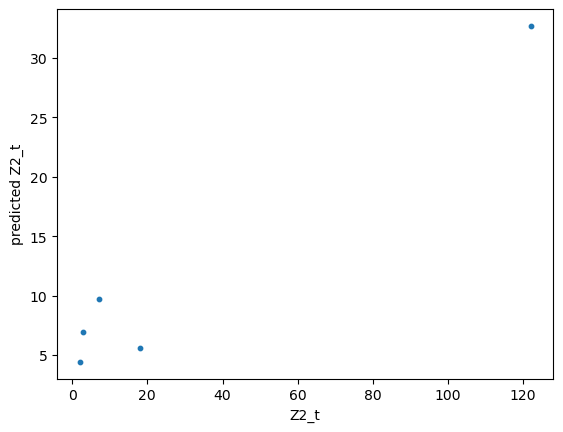

In [70]:
result2 = sm2.fit()
predictions2 = result2.predict(X2_test.assign(intercept=0))
plt.scatter(Z2_test, predictions2, s = 10)
plt.xlabel('Z2_t')
plt.ylabel('predicted Z2_t')

In [71]:
print('MAE : ', metrics.mean_absolute_error(Z2_test, predictions2))
print('MSE : ', metrics.mean_squared_error(Z2_test, predictions2))
print('RMSE : ', np.sqrt(metrics.mean_absolute_error(Z2_test, predictions2)))
print('R2 Score : ', metrics.r2_score(Z2_test, predictions2))

MAE :  22.158066759147367
MSE :  1631.196561122119
RMSE :  4.707235575063922
R2 Score :  0.23412248754736553


Lokasi 3/ Jakarta Utara

In [72]:
Z3_tmin1 = t1_invers['Jakut']
V3_tmin1 = t1_invers['V3_t1']

X3 = pd.DataFrame()
X3['Z3_tmin1'] = Z3_tmin1
X3['V3_tmin1'] = V3_tmin1
X3

,Z3_tmin1,V3_tmin1
0,0,0.000
1,94,83.105
2,54,34.669
3,73,46.496
4,49,35.331
5,57,33.361
6,23,25.474
7,18,16.872
8,11,16.135
9,11,10.767


In [73]:
Z3_t = pd.DataFrame(dbd['Jakut'])
Z3_t

,Jakut
0,94
1,54
2,73
3,49
4,57
5,23
6,18
7,11
8,11
9,53


In [74]:
X3_train, X3_test, Z3_train, Z3_test = train_test_split(X3, Z3_t, test_size = 0.1, random_state = 101)

In [75]:
# model = LinearRegression(fit_intercept=False)
# results = model.fit(X1, Z1_t)


sm3 = OLS(endog=Z3_train, exog=X3_train.assign(intercept=0))
# sm1 = OLS(endog=y1_train, exog=x1_train.assign(intercept=0))
result3 = sm3.fit()
result3.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Jakut   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              94.17
Date:                Wed, 08 Feb 2023   Prob (F-statistic):                    4.70e-16
Time:                        08:01:09   Log-Likelihood:                         -209.04
No. Observations:                  43   AIC:                                      422.1
Df Residuals:                      41   BIC:                                      425.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Z3_tmin1      -0.1824      0.210     -0.867      0.391      -0.607       0.242
V3_tmin1       0.9519      0.189      5.046      0.000       0.571       1.333
intercept           0          0        nan        nan           0           0
==============================================================================
Omnibus:                       10.607   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               23.154
Skew:                          -0.378   Prob(JB):                     9.38e-06
Kurtosis:                       6.514   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
result3.resid

1      -7.966994
44      0.059115
21     -0.680954
16    -14.828479
45      2.156655
43      8.053980
7      -1.778251
40      2.216655
3      18.052708
39     44.112931
14     19.705713
25     53.323707
15      0.768846
24     54.065818
41    -20.518831
37     53.557625
42      5.974101
26     35.787016
10     35.836622
30    -28.315135
32     -2.856034
35      7.421370
2      49.845983
27   -100.957845
47     -4.468752
34      3.156411
33      2.412568
8      -2.353402
19      0.235578
29      1.518596
12     11.035979
5       1.638306
0      94.000000
28     17.325522
4      32.303838
13     -2.761262
9      44.756663
46      5.733582
23     -1.362224
6      -2.054964
17    -31.643826
11     18.154178
31     -8.483536
dtype: float64

### Ljung Box

In [77]:
diagnostic.acorr_ljungbox(result3.resid, lags = 1)
#output (stat, p-value)

,lb_stat,lb_pvalue
1,0.721981,0.395495


### Prediction with Data Train

Text(0, 0.5, 'predicted Z2_t')

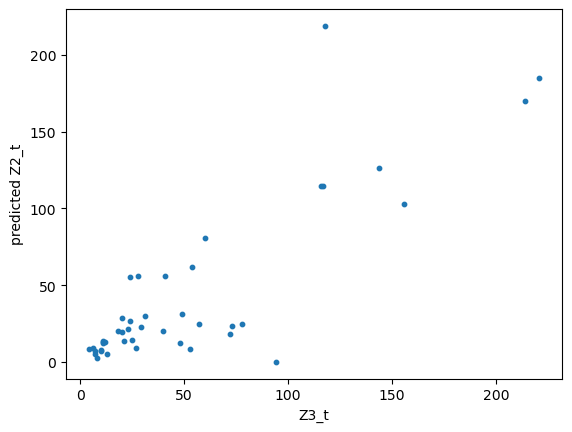

In [78]:
result3 = sm3.fit()
predictions3 = result3.predict(X3_train.assign(intercept=0))
plt.scatter(Z3_train, predictions3, s = 10)
plt.xlabel('Z3_t')
plt.ylabel('predicted Z2_t')

In [79]:
predictions3

1      61.966994
44      6.940885
21     12.680954
16     55.828479
45      4.843345
43      4.946020
7      12.778251
40    114.783345
3      30.947292
39    169.887069
14     20.294287
25    102.676293
15     30.231154
24     17.934182
41     80.518831
37     24.442375
42     23.025899
26    185.212984
10     12.163378
30     56.315135
32      8.856034
35     13.578630
2      23.154017
27    218.957845
47      8.468752
34      6.843589
33      7.587432
8      13.353402
19     19.764422
29    114.481404
12     13.964021
5      21.361694
0       0.000000
28    126.674478
4      24.696162
13     26.761262
9       8.243337
46      2.266418
23     12.362224
6      20.054964
17     55.643826
11      8.845822
31     28.483536
dtype: float64

In [80]:
print('MAE : ', metrics.mean_absolute_error(Z3_train, predictions3))
print('MSE : ', metrics.mean_squared_error(Z3_train, predictions3))
print('RMSE : ', np.sqrt(metrics.mean_absolute_error(Z3_train, predictions3)))
print('R2 Score : ', metrics.r2_score(Z3_train, predictions3))

MAE :  19.8660594119343
MSE :  977.240781929686
RMSE :  4.457135785673834
R2 Score :  0.6554967428406067


### Prediction with Data Test

Text(0, 0.5, 'predicted Z2_t')

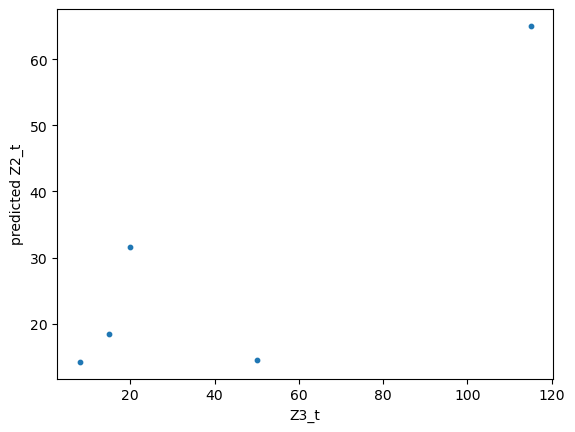

In [81]:
result3 = sm3.fit()
predictions3 = result3.predict(X3_test.assign(intercept=0))
plt.scatter(Z3_test, predictions3, s = 10)
plt.xlabel('Z3_t')
plt.ylabel('predicted Z2_t')

In [82]:
print('MAE : ', metrics.mean_absolute_error(Z3_test, predictions3))
print('MSE : ', metrics.mean_squared_error(Z3_test, predictions3))
print('RMSE : ', np.sqrt(metrics.mean_absolute_error(Z3_test, predictions3)))
print('R2 Score : ', metrics.r2_score(Z3_test, predictions3))

MAE :  21.349133408780393
MSE :  788.1707454776746
RMSE :  4.62051224527978
R2 Score :  0.49223654494300206
